In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataframe

df = pd.read_csv('train_values.csv')
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [4]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [5]:
# Seperating unwanted columns

secondary_use = df[[
       'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']]

In [6]:
# Dropping unwanted columns

df.drop(secondary_use, axis=1, inplace = True)
df.drop('building_id', axis=1, inplace=True)

In [7]:
df.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture'],
      dtype='object')

In [8]:
# loading target DataFrame

target = pd.read_csv('train_labels.csv')

In [9]:
# assigning predictor and target as X and y

X = df
y = target['damage_grade']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 29 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

<AxesSubplot:xlabel='damage_grade', ylabel='count'>

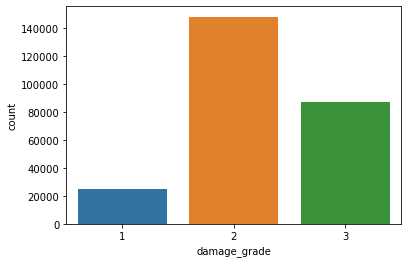

In [10]:
# Exploratory Data Analysis

sns.countplot(target['damage_grade'])

<AxesSubplot:xlabel='count_floors_pre_eq', ylabel='count'>

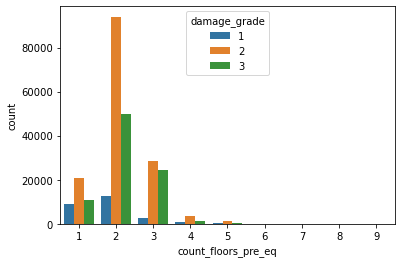

In [11]:
sns.countplot(df['count_floors_pre_eq'], hue = target['damage_grade'])

<AxesSubplot:>

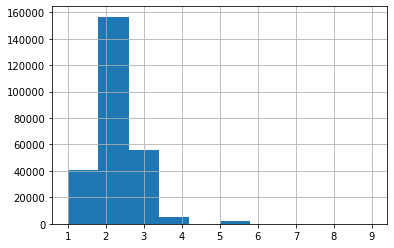

In [12]:
df.count_floors_pre_eq.hist()

In [13]:
# capping the outliers

print(df['count_floors_pre_eq'].quantile(0.50)) 
print(df['count_floors_pre_eq'].quantile(0.95)) 
df['count_floors_pre_eq'] = np.where(df['count_floors_pre_eq'] > 3, 2, df['count_floors_pre_eq'])

df.count_floors_pre_eq.describe()

2.0
3.0


count    260601.000000
mean          2.058235
std           0.604328
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: count_floors_pre_eq, dtype: float64

<AxesSubplot:xlabel='age', ylabel='count'>

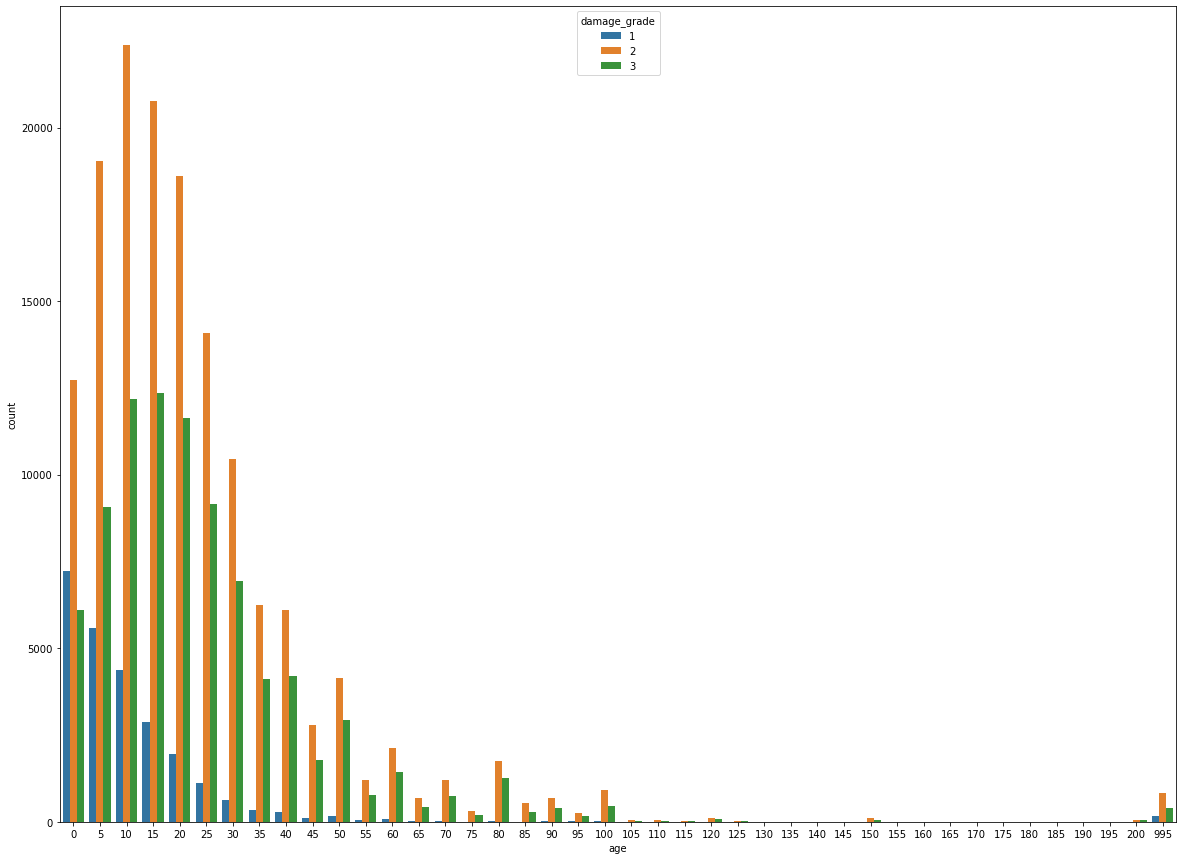

In [14]:
plt.figure(figsize = (20,15)) 
sns.countplot(df['age'], hue = target['damage_grade'])

In [15]:
print(df['age'].quantile(0.50)) 
print(df['age'].quantile(0.95)) 
df['age'] = np.where(df['age'] > 60, 15, df['age'])

df.age.describe()

15.0
60.0


count    260601.000000
mean         18.339531
std          13.736450
min           0.000000
25%          10.000000
50%          15.000000
75%          25.000000
max          60.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='area_percentage', ylabel='count'>

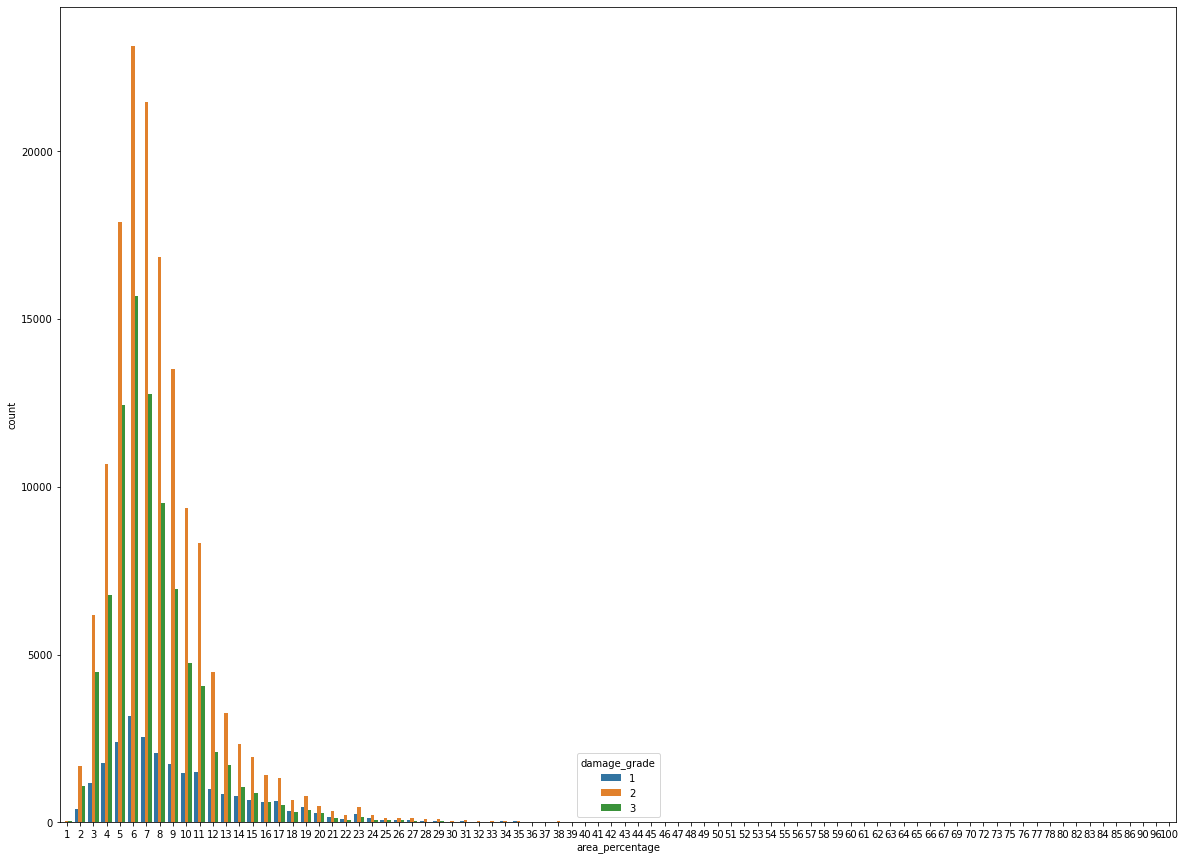

In [16]:
plt.figure(figsize = (20,15)) 
sns.countplot(df['area_percentage'], hue = target['damage_grade'])


<AxesSubplot:xlabel='area_percentage'>

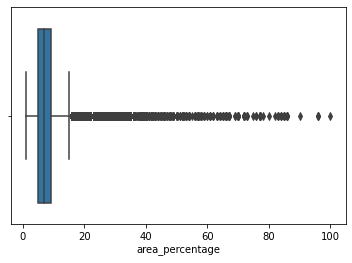

In [17]:
sns.boxplot(df['area_percentage'])

In [18]:
print(df['area_percentage'].quantile(0.50)) 
print(df['area_percentage'].quantile(0.95)) 
df['area_percentage'] = np.where(df['area_percentage'] > 16, 7, df['area_percentage'])

df.area_percentage.describe()

7.0
16.0


count    260601.000000
mean          7.382358
std           2.837060
min           1.000000
25%           5.000000
50%           7.000000
75%           9.000000
max          16.000000
Name: area_percentage, dtype: float64

<AxesSubplot:xlabel='height_percentage', ylabel='count'>

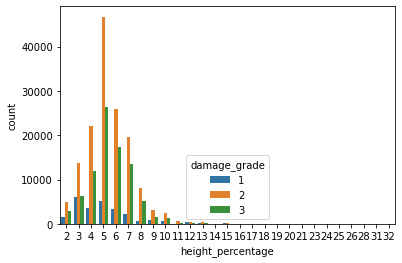

In [19]:
sns.countplot(df['height_percentage'], hue = target['damage_grade'])

<AxesSubplot:xlabel='height_percentage'>

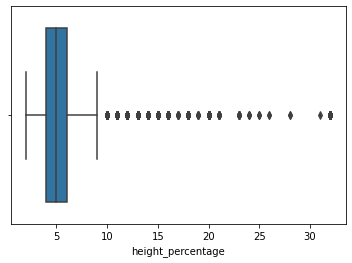

In [20]:
sns.boxplot(df['height_percentage'])

In [21]:
print(df['height_percentage'].quantile(0.50)) 
print(df['height_percentage'].quantile(0.95)) 
df['height_percentage'] = np.where(df['height_percentage'] > 9, 5, df['height_percentage'])

df.height_percentage.describe()

5.0
9.0


count    260601.000000
mean          5.241845
std           1.529406
min           2.000000
25%           4.000000
50%           5.000000
75%           6.000000
max           9.000000
Name: height_percentage, dtype: float64

In [22]:
df.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.058235,18.339531,7.382358,5.241845,0.088645,0.761935,0.034332,...,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378
std,8.033617,412.710734,3646.369645,0.604328,13.736450,2.837060,1.529406,0.284231,0.425900,0.182081,...,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,21.000000,1050.000000,9412.000000,2.000000,25.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,3.000000,60.000000,16.000000,9.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000


In [23]:
# Encoding the object data type

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

X.land_surface_condition = enc.fit_transform(X.land_surface_condition)
X.foundation_type = enc.fit_transform(X.foundation_type)
X.roof_type = enc.fit_transform(X.roof_type)
X.ground_floor_type = enc.fit_transform(X.ground_floor_type)
X.other_floor_type = enc.fit_transform(X.other_floor_type)
X.position = enc.fit_transform(X.position)
X.plan_configuration = enc.fit_transform(X.plan_configuration)
X.legal_ownership_status = enc.fit_transform(X.legal_ownership_status)
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture
0,6,487,12198,2,30,6,5,2,2,0,...,0,0,0,0,0,0,2,1,0,0
1,8,900,2812,2,10,8,7,1,2,0,...,0,0,0,0,0,0,2,1,0,0
2,21,363,8973,2,10,5,5,2,2,0,...,0,0,0,0,0,0,2,1,0,0
3,22,418,10694,2,10,6,5,2,2,0,...,0,1,1,0,0,0,2,1,0,0
4,11,131,1488,3,30,8,9,2,2,0,...,0,0,0,0,0,0,2,1,0,0


In [24]:
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture
0,6,487,12198,2,30,6,5,2,2,0,...,0,0,0,0,0,0,2,1,0,0
1,8,900,2812,2,10,8,7,1,2,0,...,0,0,0,0,0,0,2,1,0,0
2,21,363,8973,2,10,5,5,2,2,0,...,0,0,0,0,0,0,2,1,0,0
3,22,418,10694,2,10,6,5,2,2,0,...,0,1,1,0,0,0,2,1,0,0
4,11,131,1488,3,30,8,9,2,2,0,...,0,0,0,0,0,0,2,1,0,0


In [25]:
! pip install xgboost

In [26]:
# Import xgboost

from xgboost import XGBClassifier


In [ ]:
# XGB using cross validation approach

from sklearn.model_selection import cross_val_score
model = XGBClassifier(learning_rate =0.5, random_state=10)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(scores)
print("Average accuracy:", scores.mean())
print("std :", scores.std())

#std < 0.05 = good model

In [27]:
# XGB using train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [28]:
model = XGBClassifier(learning_rate = 0.8, max_depth=7, random_state =10)

In [29]:
model.fit(X_train,y_train)

[18:40:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.8, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [30]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.806550816796404
0.7413565955922794
